# Cardiovascular Disease with Random Forest Classification

In [6]:
import numpy as np
import pandas as pd
import matplotlib as splt
import seaborn

In [9]:
df= pd.read_csv(r'C:\Users\shhimel\Desktop\cardio_train.csv',sep=';')

In [10]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [16]:
df= df.drop(['id'],axis=1)

In [17]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [19]:
df.shape

(70000, 12)

In [22]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [58]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\shhimel\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

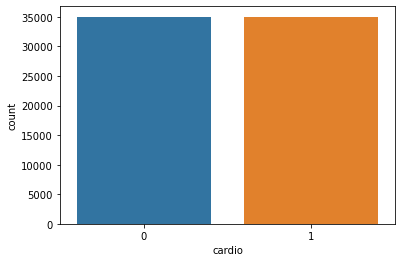

In [24]:
seaborn.countplot(df['cardio'])

<AxesSubplot:xlabel='gender', ylabel='count'>

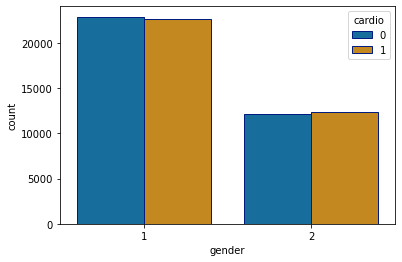

In [27]:
seaborn.countplot(x='gender',hue='cardio',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

<AxesSubplot:xlabel='cholesterol', ylabel='count'>

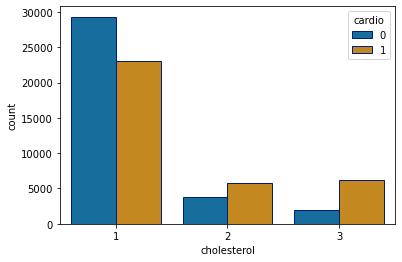

In [59]:
seaborn.countplot(x='cholesterol',hue='cardio',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

In [30]:
y= df.iloc[:,11]

In [31]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [32]:
x= df.drop(['cardio'],axis=1)

In [33]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [34]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.20,random_state=1)

In [37]:
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
57050,20275,1,156,73.0,120,80,2,1,0,0,1
66119,19628,2,172,78.0,150,100,1,1,1,1,1
2762,22066,1,157,60.0,100,60,2,1,0,0,1
6182,19626,2,168,75.0,120,80,1,1,0,0,1
35804,21884,2,166,64.0,150,90,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1
20609,19116,1,164,68.0,120,80,1,1,0,0,0
21440,18049,2,178,82.0,120,80,1,1,0,0,1
50057,21957,1,169,77.0,120,80,1,1,0,0,0


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model = RandomForestClassifier()

In [52]:
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [53]:
model.score(xtest,ytest)

0.7202142857142857

In [54]:
y_predicted = model.predict(xtest)

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
cm = confusion_matrix(ytest,y_predicted)
cm

array([[5108, 1809],
       [2108, 4975]], dtype=int64)

Text(69.0, 0.5, 'Truth')

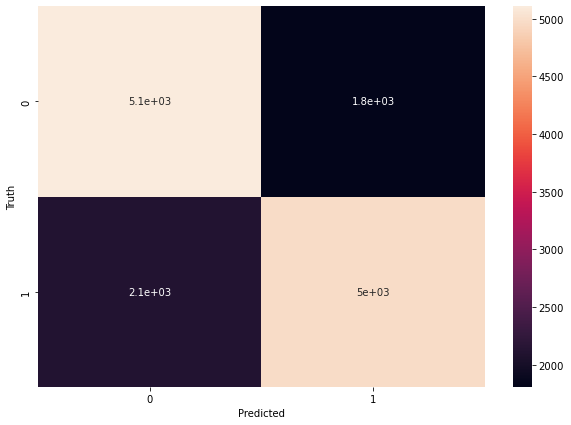

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
seaborn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')